In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
# sys.path.append(r'E:/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
# sys.path.append('/Users/yanbin/Documents/Projects/AI-Middle-Project/')
# sys.path.append('/Users/yanbin/Documents/Projects/mylearn')

# sys.path.append('/home/wyf/0code/AI-Middle-Project/')
# sys.path.append('/home/wyf/0code/mylearn')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logger import get_logger
from neural_network import MLPClassifier
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.metrics.classification import precision_score


mylogger = get_logger(__name__)
mylogger.debug('hello world')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[DEBUG] __init__ __init__.py - pylab_setup line 90 - 
backend module://ipykernel.pylab.backend_inline version unknown
 - (2018-10-21 03:06:33)

[DEBUG] <ipython-input-9-e9151479415d> <ipython-input-9-e9151479415d> - <module> line 24 - 
hello world
 - (2018-10-21 03:06:33)



# 读取数据

In [2]:
train_X_vec2doc = np.load('../data/clean/trainX_vec2doc-24000-500.npy')
test_X_vec2doc = np.load('../data/clean/testX_vec2doc-6000-500.npy')

In [3]:
train_ori_Y = np.load('../data/clean/trainY_24000.npy')

# 使用vec2doc进行交叉验证(新锐处理过的）

## 测试单层

In [4]:
train_X = train_X_vec2doc.T
test_X = test_X_vec2doc.T
train_Y  = train_ori_Y.reshape((-1,1))
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [5]:
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)
train_Y = pd.DataFrame(train_Y)
train_X.shape,train_Y.shape,test_X.shape

((500, 24000), (24000, 1), (500, 6000))

In [6]:
learning_rates = [0.5, 0.3, 0.1, 0.05, 0.02, 0.01]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(4,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5062575747035052
 - (2018-10-21 02:58:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20270833333333332, training score 0.20572916666666666
 - (2018-10-21 02:58:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5019968169294368
 - (2018-10-21 02:58:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21041666666666667, training score 0.20104166666666667
 - (2018-10-21 02:58:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5011828094365555
 - (2018-10-21 02:58:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21041666666666667, training score 0.190625
 - (2018-10-21 02:58:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.500303

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2970833333333333, training score 0.3078125
 - (2018-10-21 02:59:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.488522031911988
 - (2018-10-21 02:59:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30354166666666665, training score 0.31666666666666665
 - (2018-10-21 02:59:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4852581420381044
 - (2018-10-21 02:59:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2947916666666667, training score 0.3265625
 - (2018-10-21 02:59:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.48513565690708654
 - (2018-10-21 02:59:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.301666

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.5008129769614548
 - (2018-10-21 02:59:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21041666666666667, training score 0.20052083333333334
 - (2018-10-21 02:59:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5009180484363431
 - (2018-10-21 02:59:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.213125, training score 0.19739583333333333
 - (2018-10-21 02:59:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5005032240825729
 - (2018-10-21 02:59:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21354166666666666, training score 0.19427083333333334
 - (2018-10-21 02:59:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.50060

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26208333333333333, training score 0.2515625
 - (2018-10-21 03:00:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4974102301712252
 - (2018-10-21 03:00:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2710416666666667, training score 0.25833333333333336
 - (2018-10-21 03:00:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.49719238939787674
 - (2018-10-21 03:00:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2683333333333333, training score 0.26666666666666666
 - (2018-10-21 03:00:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.49661324224014103
 - (2018-10-21 03:00:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.5005392495432267
 - (2018-10-21 03:00:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21375, training score 0.20052083333333334
 - (2018-10-21 03:00:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.5010623736526534
 - (2018-10-21 03:00:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21020833333333333, training score 0.18958333333333333
 - (2018-10-21 03:00:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5010626163295514
 - (2018-10-21 03:00:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21041666666666667, training score 0.20104166666666667
 - (2018-10-21 03:00:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.50

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21625, training score 0.20572916666666666
 - (2018-10-21 03:01:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.5000051937230525
 - (2018-10-21 03:01:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.218125, training score 0.20885416666666667
 - (2018-10-21 03:01:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.5002365279083517
 - (2018-10-21 03:01:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21895833333333334, training score 0.20677083333333332
 - (2018-10-21 03:01:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.500901197975362
 - (2018-10-21 03:01:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22083333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.5009246389025194
 - (2018-10-21 03:01:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21270833333333333, training score 0.21458333333333332
 - (2018-10-21 03:01:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.5007769392615947
 - (2018-10-21 03:01:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.213125, training score 0.209375
 - (2018-10-21 03:01:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.500732102444107
 - (2018-10-21 03:01:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21083333333333334, training score 0.20989583333333334
 - (2018-10-21 03:01:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.5009258941158

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.5001084260525153
 - (2018-10-21 03:02:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2175, training score 0.20260416666666667
 - (2018-10-21 03:02:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.5006939864578257
 - (2018-10-21 03:02:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21645833333333334, training score 0.19166666666666668
 - (2018-10-21 03:02:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.5008007032527996
 - (2018-10-21 03:02:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21541666666666667, training score 0.19895833333333332
 - (2018-10-21 03:02:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.500

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20708333333333334, training score 0.19583333333333333
 - (2018-10-21 03:02:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.501294495155654
 - (2018-10-21 03:02:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20645833333333333, training score 0.2015625
 - (2018-10-21 03:02:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.5016333663375322
 - (2018-10-21 03:02:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20770833333333333, training score 0.20416666666666666
 - (2018-10-21 03:02:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.5015103236776044
 - (2018-10-21 03:02:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.5015397749535091
 - (2018-10-21 03:03:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21125, training score 0.18645833333333334
 - (2018-10-21 03:03:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.5010704538333398
 - (2018-10-21 03:03:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21229166666666666, training score 0.19166666666666668
 - (2018-10-21 03:03:30)

0.21208333333333335
[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5062575747035052
 - (2018-10-21 03:03:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20270833333333332, training score 0.20572916666666666
 - (2018-10-21 03:03:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20354166666666668, training score 0.22239583333333332
 - (2018-10-21 03:04:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.5021292830913715
 - (2018-10-21 03:04:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20333333333333334, training score 0.20677083333333332
 - (2018-10-21 03:04:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[270] loss 0.5021100344897804
 - (2018-10-21 03:04:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20479166666666668, training score 0.20677083333333332
 - (2018-10-21 03:04:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.503206640035077
 - (2018-10-21 03:04:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
vali

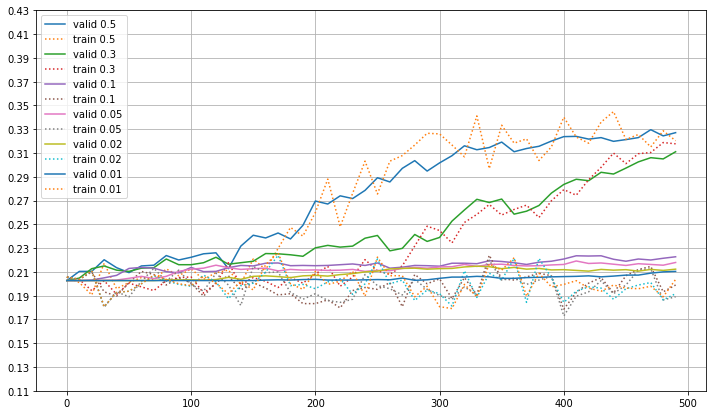

In [13]:
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 单层，更多的隐藏层节点

In [23]:
learning_rate = 0.3
hidden_sizes = range(2, 41, 5)
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []
for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for hidden_size in hidden_sizes:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(hidden_size,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=1000, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5144185458876138
 - (2018-10-21 03:40:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.200625, training score 0.21927083333333333
 - (2018-10-21 03:40:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5042135214248735
 - (2018-10-21 03:40:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20083333333333334, training score 0.21145833333333333
 - (2018-10-21 03:40:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5016020594881083
 - (2018-10-21 03:40:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.200625, training score 0.19322916666666667
 - (2018-10-21 03:40:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5010058853484833


[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20791666666666667, training score 0.2265625
 - (2018-10-21 03:41:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.49948028366386205
 - (2018-10-21 03:41:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.215625, training score 0.22395833333333334
 - (2018-10-21 03:41:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.49922276919268993
 - (2018-10-21 03:41:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.210625, training score 0.221875
 - (2018-10-21 03:41:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.4999933569746514
 - (2018-10-21 03:41:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21458333333333332, traini

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[550] loss 0.48893781197318475
 - (2018-10-21 03:41:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2783333333333333, training score 0.2942708333333333
 - (2018-10-21 03:41:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[560] loss 0.48859413146535435
 - (2018-10-21 03:41:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.28770833333333334, training score 0.28125
 - (2018-10-21 03:41:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[570] loss 0.4880218280072844
 - (2018-10-21 03:41:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.28979166666666667, training score 0.3104166666666667
 - (2018-10-21 03:41:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.486

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30854166666666666, training score 0.3255208333333333
 - (2018-10-21 03:42:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[830] loss 0.47666659170021936
 - (2018-10-21 03:42:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31083333333333335, training score 0.31197916666666664
 - (2018-10-21 03:42:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[840] loss 0.47172660325951343
 - (2018-10-21 03:42:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31145833333333334, training score 0.328125
 - (2018-10-21 03:42:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 0.473411903306321
 - (2018-10-21 03:42:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.49510990580402486
 - (2018-10-21 03:42:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27291666666666664, training score 0.27760416666666665
 - (2018-10-21 03:42:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.4942539576450387
 - (2018-10-21 03:42:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27625, training score 0.29635416666666664
 - (2018-10-21 03:42:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.49318810705091337
 - (2018-10-21 03:42:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.28291666666666665, training score 0.30833333333333335
 - (2018-10-21 03:42:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32916666666666666, training score 0.32916666666666666
 - (2018-10-21 03:43:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.4692152145564188
 - (2018-10-21 03:43:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.328125, training score 0.3328125
 - (2018-10-21 03:43:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.4674716466813166
 - (2018-10-21 03:43:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32895833333333335, training score 0.33125
 - (2018-10-21 03:43:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.46664312281786946
 - (2018-10-21 03:43:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.331875, training

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.46182451726690193
 - (2018-10-21 03:43:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33479166666666665, training score 0.3328125
 - (2018-10-21 03:43:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[660] loss 0.46410047858232073
 - (2018-10-21 03:43:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33541666666666664, training score 0.3375
 - (2018-10-21 03:43:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[670] loss 0.4646119152854603
 - (2018-10-21 03:43:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.335625, training score 0.33541666666666664
 - (2018-10-21 03:43:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[680] loss 0.4624294281088432
 - (2

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.4609345432915445
 - (2018-10-21 03:44:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33395833333333336, training score 0.3421875
 - (2018-10-21 03:44:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[940] loss 0.46187227997093866
 - (2018-10-21 03:44:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33479166666666665, training score 0.328125
 - (2018-10-21 03:44:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[950] loss 0.4562466488238589
 - (2018-10-21 03:44:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3329166666666667, training score 0.3494791666666667
 - (2018-10-21 03:44:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.458993122756

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2866666666666667, training score 0.31145833333333334
 - (2018-10-21 03:44:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.4859735378263061
 - (2018-10-21 03:44:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.288125, training score 0.3072916666666667
 - (2018-10-21 03:44:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.4848304617910063
 - (2018-10-21 03:44:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30020833333333335, training score 0.3265625
 - (2018-10-21 03:44:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.484699700958576
 - (2018-10-21 03:44:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30229166

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.46603617319809143
 - (2018-10-21 03:45:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3252083333333333, training score 0.3494791666666667
 - (2018-10-21 03:45:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.4659780867870582
 - (2018-10-21 03:45:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32729166666666665, training score 0.3302083333333333
 - (2018-10-21 03:45:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[500] loss 0.468573320861408
 - (2018-10-21 03:45:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32958333333333334, training score 0.33177083333333335
 - (2018-10-21 03:45:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32916666666666666, training score 0.34791666666666665
 - (2018-10-21 03:46:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[760] loss 0.4601314214127301
 - (2018-10-21 03:46:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3285416666666667, training score 0.3380208333333333
 - (2018-10-21 03:46:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[770] loss 0.4600657107663315
 - (2018-10-21 03:46:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3302083333333333, training score 0.36041666666666666
 - (2018-10-21 03:46:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[780] loss 0.4594013327186692
 - (2018-10-21 03:46:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
valida

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5003617189872599
 - (2018-10-21 03:46:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21104166666666666, training score 0.21875
 - (2018-10-21 03:46:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.4994348720934238
 - (2018-10-21 03:46:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21729166666666666, training score 0.22864583333333333
 - (2018-10-21 03:46:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.499242618811004
 - (2018-10-21 03:46:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23020833333333332, training score 0.23385416666666667
 - (2018-10-21 03:46:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.4986162

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.4685789366459158
 - (2018-10-21 03:47:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32625, training score 0.35833333333333334
 - (2018-10-21 03:47:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.47158826800597337
 - (2018-10-21 03:47:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32395833333333335, training score 0.34010416666666665
 - (2018-10-21 03:47:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.47217588016709144
 - (2018-10-21 03:47:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32875, training score 0.328125
 - (2018-10-21 03:47:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.4700656856968447
 - (20

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3329166666666667, training score 0.3541666666666667
 - (2018-10-21 03:48:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[590] loss 0.46076573178341534
 - (2018-10-21 03:48:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33520833333333333, training score 0.3375
 - (2018-10-21 03:48:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[600] loss 0.4631272390342673
 - (2018-10-21 03:48:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33416666666666667, training score 0.33177083333333335
 - (2018-10-21 03:48:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[610] loss 0.4658775484062592
 - (2018-10-21 03:48:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[860] loss 0.4584517994546017
 - (2018-10-21 03:48:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33375, training score 0.3541666666666667
 - (2018-10-21 03:48:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[870] loss 0.46033885101228955
 - (2018-10-21 03:48:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33666666666666667, training score 0.3416666666666667
 - (2018-10-21 03:48:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[880] loss 0.4600082002029399
 - (2018-10-21 03:48:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3304166666666667, training score 0.3390625
 - (2018-10-21 03:48:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[890] loss 0.46650937636319

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2764583333333333, training score 0.30520833333333336
 - (2018-10-21 03:49:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.4920253455088029
 - (2018-10-21 03:49:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27791666666666665, training score 0.29635416666666664
 - (2018-10-21 03:49:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.4913260784708787
 - (2018-10-21 03:49:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.284375, training score 0.28854166666666664
 - (2018-10-21 03:49:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.49046384828339457
 - (2018-10-21 03:49:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.46556541354936376
 - (2018-10-21 03:50:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33208333333333334, training score 0.33489583333333334
 - (2018-10-21 03:50:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.4663351784000006
 - (2018-10-21 03:50:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33645833333333336, training score 0.34010416666666665
 - (2018-10-21 03:50:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.46845632215410027
 - (2018-10-21 03:50:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33791666666666664, training score 0.33229166666666665
 - (2018-10-21 03:50:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33479166666666665, training score 0.3697916666666667
 - (2018-10-21 03:51:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[690] loss 0.46076706999961453
 - (2018-10-21 03:51:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.335, training score 0.3494791666666667
 - (2018-10-21 03:51:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[700] loss 0.46446574084153897
 - (2018-10-21 03:51:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3358333333333333, training score 0.3375
 - (2018-10-21 03:51:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[710] loss 0.4632023756937375
 - (2018-10-21 03:51:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33875, train

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.4579779239258406
 - (2018-10-21 03:51:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3410416666666667, training score 0.35885416666666664
 - (2018-10-21 03:51:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[970] loss 0.45815019399355067
 - (2018-10-21 03:51:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34, training score 0.3453125
 - (2018-10-21 03:51:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[980] loss 0.4552768530067414
 - (2018-10-21 03:51:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.341875, training score 0.365625
 - (2018-10-21 03:51:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[990] loss 0.4557446571349167
 - (2018-10-21 03:51

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.299375, training score 0.3296875
 - (2018-10-21 03:52:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.47957042205265465
 - (2018-10-21 03:52:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30041666666666667, training score 0.3265625
 - (2018-10-21 03:52:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.48009862750944926
 - (2018-10-21 03:52:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30395833333333333, training score 0.325
 - (2018-10-21 03:52:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4797085450047617
 - (2018-10-21 03:52:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30333333333333334, training

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] loss 0.46585526242755065
 - (2018-10-21 03:53:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3302083333333333, training score 0.325
 - (2018-10-21 03:53:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[520] loss 0.46162281674141886
 - (2018-10-21 03:53:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33270833333333333, training score 0.34427083333333336
 - (2018-10-21 03:53:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[530] loss 0.4645159926965876
 - (2018-10-21 03:53:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3310416666666667, training score 0.3458333333333333
 - (2018-10-21 03:53:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[540] loss 0.46794

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.335625, training score 0.35208333333333336
 - (2018-10-21 03:54:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[790] loss 0.4561132229697332
 - (2018-10-21 03:54:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33416666666666667, training score 0.353125
 - (2018-10-21 03:54:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[800] loss 0.45974757328312044
 - (2018-10-21 03:54:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33479166666666665, training score 0.3671875
 - (2018-10-21 03:54:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[810] loss 0.459683613016816
 - (2018-10-21 03:54:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3327083333333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.4986613543182064
 - (2018-10-21 03:55:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22604166666666667, training score 0.23958333333333334
 - (2018-10-21 03:55:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.4975075351453356
 - (2018-10-21 03:55:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22708333333333333, training score 0.234375
 - (2018-10-21 03:55:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.49608623336199004
 - (2018-10-21 03:55:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23083333333333333, training score 0.24895833333333334
 - (2018-10-21 03:55:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[90] loss 0.4961

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.46855911192273664
 - (2018-10-21 03:56:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31979166666666664, training score 0.35208333333333336
 - (2018-10-21 03:56:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.4740315069948208
 - (2018-10-21 03:56:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32145833333333335, training score 0.3145833333333333
 - (2018-10-21 03:56:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.4691006115773633
 - (2018-10-21 03:56:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32166666666666666, training score 0.3390625
 - (2018-10-21 03:56:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0.

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[620] loss 0.4588541325121439
 - (2018-10-21 03:56:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.331875, training score 0.346875
 - (2018-10-21 03:56:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[630] loss 0.45615044656883125
 - (2018-10-21 03:56:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33145833333333335, training score 0.3671875
 - (2018-10-21 03:56:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[640] loss 0.4572177681735195
 - (2018-10-21 03:56:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3285416666666667, training score 0.353125
 - (2018-10-21 03:56:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.4636240056605817
 - (2018-10-21 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[900] loss 0.4590674113807366
 - (2018-10-21 03:57:46)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3304166666666667, training score 0.3416666666666667
 - (2018-10-21 03:57:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[910] loss 0.45622436831877233
 - (2018-10-21 03:57:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3383333333333333, training score 0.3640625
 - (2018-10-21 03:57:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[920] loss 0.4572836806055041
 - (2018-10-21 03:57:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.335625, training score 0.3734375
 - (2018-10-21 03:57:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.4546023468389974
 - (20

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.29375, training score 0.30364583333333334
 - (2018-10-21 03:58:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.48226935547724425
 - (2018-10-21 03:58:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2995833333333333, training score 0.3109375
 - (2018-10-21 03:58:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.4810490413162983
 - (2018-10-21 03:58:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30041666666666667, training score 0.3234375
 - (2018-10-21 03:58:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 0.4799376158117031
 - (2018-10-21 03:58:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3045833333333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.4670563981765279
 - (2018-10-21 03:59:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33395833333333336, training score 0.3458333333333333
 - (2018-10-21 03:59:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.4655184517461696
 - (2018-10-21 03:59:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33208333333333334, training score 0.33958333333333335
 - (2018-10-21 03:59:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[470] loss 0.45873231894475075
 - (2018-10-21 03:59:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3325, training score 0.35052083333333334
 - (2018-10-21 03:59:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.463

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.339375, training score 0.365625
 - (2018-10-21 04:00:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[730] loss 0.45752664855471525
 - (2018-10-21 04:00:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33979166666666666, training score 0.3625
 - (2018-10-21 04:00:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[740] loss 0.462999062165486
 - (2018-10-21 04:00:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3389583333333333, training score 0.33697916666666666
 - (2018-10-21 04:00:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.4581358160351581
 - (2018-10-21 04:00:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3414583333333333, tr

0.3439583333333333


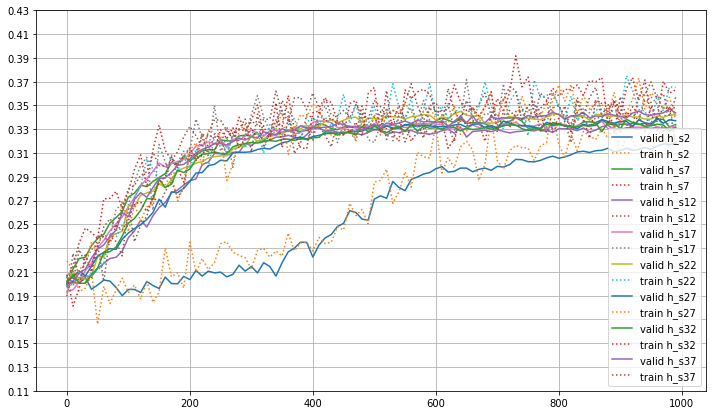

In [24]:
hidden_sizes = range(2, 41, 5)
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid h_s'+ str(hidden_sizes[i]))
    plt.plot(num_iterations, train_scores, ':', label='train h_s'+ str(hidden_sizes[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 测试多层

In [16]:
models_2 = []
learning_rates = [0.5, 0.3, 0.1]
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)

for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(8,4), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5053056310889676
 - (2018-10-21 03:12:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19541666666666666, training score 0.17552083333333332
 - (2018-10-21 03:12:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.50122330359379
 - (2018-10-21 03:12:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20104166666666667, training score 0.2140625
 - (2018-10-21 03:12:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5001055624873121
 - (2018-10-21 03:12:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20041666666666666, training score 0.21770833333333334
 - (2018-10-21 03:12:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5003685

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26958333333333334, training score 0.2859375
 - (2018-10-21 03:13:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.48211547001283056
 - (2018-10-21 03:13:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27625, training score 0.26666666666666666
 - (2018-10-21 03:13:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4812720263040935
 - (2018-10-21 03:13:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3016666666666667, training score 0.30052083333333335
 - (2018-10-21 03:13:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.47943791150303144
 - (2018-10-21 03:13:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30354

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.500463196338438
 - (2018-10-21 03:13:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.201875, training score 0.21875
 - (2018-10-21 03:13:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.5006694431721062
 - (2018-10-21 03:14:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20229166666666668, training score 0.2
 - (2018-10-21 03:14:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.5003795684877501
 - (2018-10-21 03:14:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20104166666666667, training score 0.21770833333333334
 - (2018-10-21 03:14:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.5005564697122249
 - (2018-10-21 03

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22083333333333333, training score 0.2203125
 - (2018-10-21 03:14:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4971685247633595
 - (2018-10-21 03:14:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22458333333333333, training score 0.2265625
 - (2018-10-21 03:14:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.4964390267471649
 - (2018-10-21 03:14:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22541666666666665, training score 0.21770833333333334
 - (2018-10-21 03:14:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.49718437519761915
 - (2018-10-21 03:14:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.24,

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.5007022504940145
 - (2018-10-21 03:15:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19854166666666667, training score 0.221875
 - (2018-10-21 03:15:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.5001818229825072
 - (2018-10-21 03:15:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19791666666666666, training score 0.2
 - (2018-10-21 03:15:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5004507798251906
 - (2018-10-21 03:15:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19729166666666667, training score 0.1984375
 - (2018-10-21 03:15:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.5000862014810287
 - (2018-1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.204375, training score 0.20677083333333332
 - (2018-10-21 03:16:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.5001945658228715
 - (2018-10-21 03:16:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20416666666666666, training score 0.20885416666666667
 - (2018-10-21 03:16:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.5004181935320285
 - (2018-10-21 03:16:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20520833333333333, training score 0.21354166666666666
 - (2018-10-21 03:16:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.49990669136666493
 - (2018-10-21 03:16:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

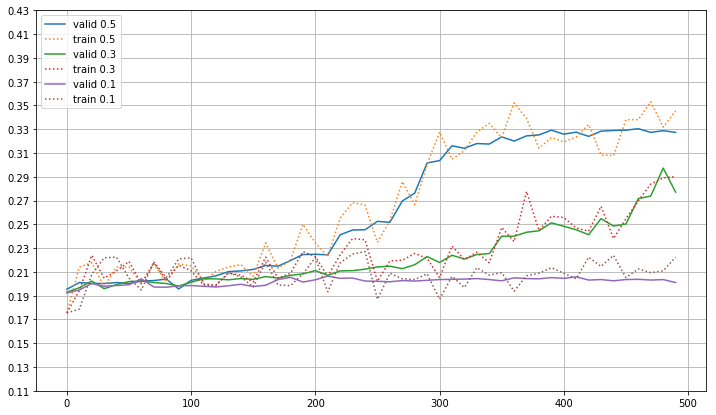

In [18]:
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 测试单层节点数变化